In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
summary_data = pd.merge(clinical_trial_df, mouse_drug_df, on='Mouse ID', how = 'outer')

# Display the data table for preview
summary_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

mean_tumor_vol = summary_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# aaa = summary_data.groupby(['Drug'])
# aaa.nth([1,-1])
mean_df = mean_tumor_vol.reset_index()
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
mean_pivot = mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [4]:
st_err = summary_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
s_err = st_err.reset_index()
s_err.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

s_err_pivot = s_err.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
s_err_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


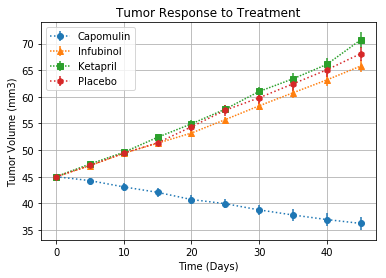

In [6]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Purposefully different linestyles are used to help me in understanding the variations
a = plt.errorbar(mean_pivot.index, mean_pivot['Capomulin'], s_err_pivot['Capomulin'], fmt='o', linestyle='dotted', label='Capomulin')
b = plt.errorbar(mean_pivot.index, mean_pivot['Infubinol'], s_err_pivot['Infubinol'], fmt='^', linestyle=(0, (1, 1)), label='Infubinol')
c = plt.errorbar(mean_pivot.index, mean_pivot['Ketapril'], s_err_pivot['Ketapril'], fmt='s',  linestyle=(0, (1, 1)), label='Ketapril')
d = plt.errorbar(mean_pivot.index, mean_pivot['Placebo'], s_err_pivot['Placebo'], fmt='h', linestyle=':', label='Placebo')

plt.legend(handles=[a, b, c, d], loc='best')
# Give the chart a title, x label, and y label
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save an image of the chart and print it to the screen
plt.savefig("../Images/TumorResponse.png")
plt.show()

# from scipy import stats
# bb = summary_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
# bb.agg(stats.sem)
# standard_errors = stats.sem(bb)
# bb

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

mean_metastatic_resp = summary_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
mms_df = mean_metastatic_resp.to_frame()
mms_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
mms_flat_df = mms_df.reset_index()
mms_flat_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
st_err_ms = summary_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
s_err_ms = st_err_ms.reset_index()
s_err_ms.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [12]:
mms_pivot = mms_flat_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mms_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
s_err_ms_pivot = s_err_ms.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
s_err_ms_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


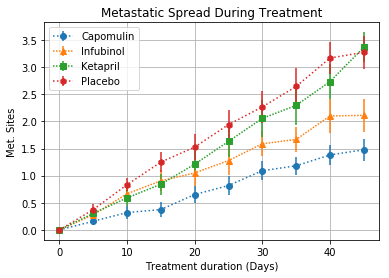

In [14]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
a = plt.errorbar(mms_pivot.index, mms_pivot['Capomulin'], s_err_ms_pivot['Capomulin'], fmt='o', linestyle='dotted', label='Capomulin')
b = plt.errorbar(mms_pivot.index, mms_pivot['Infubinol'], s_err_ms_pivot['Infubinol'], fmt='^', linestyle=(0, (1, 1)), label='Infubinol')
c = plt.errorbar(mms_pivot.index, mms_pivot['Ketapril'], s_err_ms_pivot['Ketapril'], fmt='s',  linestyle=(0, (1, 1)), label='Ketapril')
d = plt.errorbar(mms_pivot.index, mms_pivot['Placebo'], s_err_ms_pivot['Placebo'], fmt='h', linestyle=':', label='Placebo')

plt.legend(handles=[a, b, c, d], loc='best')
# Give the chart a title, x label, and y label
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()

# Save an image of the chart and print it to the screen
plt.savefig("../Images/MetastaticSpread.png")
plt.show()


## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
mouse_count = summary_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# aaa = summary_data.groupby(['Drug'])
# aaa.nth([1,-1])
mouse_count = mouse_count.reset_index().rename(columns={'Mouse ID':'Mouse Count'})
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
mouse_pivot = mouse_count.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
mouse_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [17]:
mouse_pivot = ((mouse_pivot * 100)/ (mouse_pivot.iloc[0])).round(2)
mouse_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


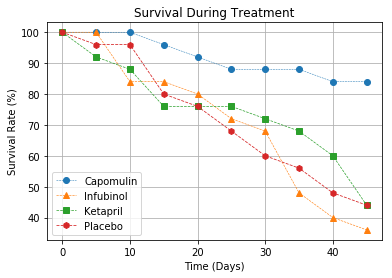

In [18]:
# Generate the Plot (Accounting for percentages)

# Because plt.plot can plot more than one line at once, it returns a list of line2D objects,
# even if we only plot one line (i.e. in this case, a list of length 1).
# When we grab its handle for the legend, we want to only use the first item of this
# list (the actual line2D object).

# There are (at least) two wayswe can resolve this:

# 1) add a comma after the handle name when we call plt.plot, to only store the first item from the list
# 2) Use only the first item in the list when we call plt.legend (a[0]):
    
a, = plt.plot(mouse_pivot.index, mouse_pivot['Capomulin'], linestyle='--', label='Capomulin', lw=0.5, marker='o')
b, = plt.plot(mouse_pivot.index, mouse_pivot['Infubinol'], linestyle='--', label='Infubinol', lw=0.6, marker='^')
c, = plt.plot(mouse_pivot.index, mouse_pivot['Ketapril'], linestyle='--', label='Ketapril', lw=0.7, marker='s')
d, = plt.plot(mouse_pivot.index, mouse_pivot['Placebo'], linestyle='--', label='Placebo', lw=0.8, marker='h')

plt.legend(handles=[a, b, c, d], loc='best')
# Give the chart a title, x label, and y label
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# Save an image of the chart and print it to the screen
plt.savefig("../Images/SurvivalRate.png")
plt.show()


## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [20]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure


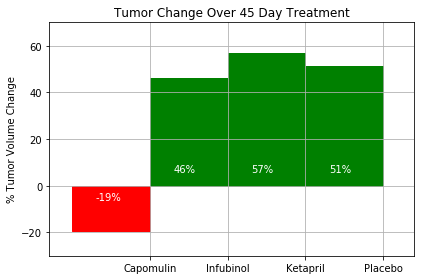

In [21]:
from IPython.display import display
tumor_chg = summary_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# aaa = summary_data.groupby(['Drug'])
# aaa.nth([1,-1])
#display(pct_change.reset_index().head())
tumor_chg = tumor_chg.reset_index()
tumor_chg
tumor_chg_pvt = tumor_chg.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_chg = tumor_chg_pvt[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
tumor_chg
tumor_chg = tumor_chg.iloc[[0, -1]]
#tumor_chg['delta'] = tumor_chg['Capomulin'] - tumor_chg['Capomulin'].shift(1)
days = tumor_chg.index[1]
drug_name = tumor_chg.columns.tolist()
drug_name
tumor_chg = tumor_chg.diff().values.tolist()
tumor_chg = tumor_chg[1]
pct_tumor_chg = [(i * 100)/days for i in tumor_chg]
pct_tumor_chg
labels = ['{:2.0f}%'.format(i) for i in pct_tumor_chg]

barlist = plt.bar(drug_name, pct_tumor_chg, width=1)
for i, val in enumerate(pct_tumor_chg):
    x_pos = barlist[i].get_x()
    if(val < 0):
        barlist[i].set_color('r')
        plt.text(x_pos+0.3, -6, labels[i], color='w')
    else:
        barlist[i].set_color('g')
        plt.text(x_pos+0.3, 6, labels[i], color='w')

plt.axis([-0.8,3.9,-30,70])
plt.xticks([0.499,1.499,2.499,3.499])
plt.yticks([-20,0,20,40,60])
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()
plt.tight_layout()
# Save an image of the chart and print it to the screen
plt.savefig("../Images/SummaryTumorChange.png")
plt.show()
# start = tumor_chg.loc[tumor_chg['Timepoint'] == 0, 'Tumor Volume (mm3)'].tolist()
# end = tumor_chg.loc[tumor_chg['Timepoint'] == 45, 'Tumor Volume (mm3)'].tolist()
# chg = []
# for i in range(len(start)):
#     chg.append(((end[i] - start[i]) * 100)/45)